In [1]:
# Abalone
# Goal: predict age


import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
%matplotlib inline

data = pd.read_csv('data/abalone.data', header=None)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

cleaned_data = pd.get_dummies(data)

# grouping ring classes 1-8, 9 and 10, and 11 on

target_column_index = 8
X = cleaned_data.drop(target_column_index, axis=1)

poly = PolynomialFeatures(3) # works better than 3 :)
X_poly = poly.fit_transform(X)

y_pre = cleaned_data[target_column_index]
y = np.where(y_pre <= 8, 1, np.where(y_pre <= 10, 2, 3)) # grouping ring classes 1-8, 9 and 10, and 11 on
clf = LinearSVC()

LR: 0.650692 (0.028157)


/usr/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.649749 (0.021773)
KNN: 0.616954 (0.027327)
CART: 0.559013 (0.020009)
NB: 0.554282 (0.064033)
SVM: 0.555468 (0.065278)


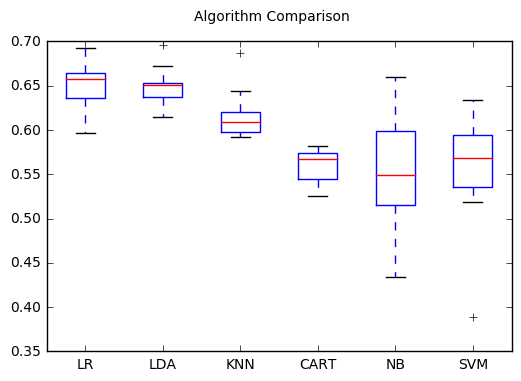

In [5]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(11,1)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Next up! Do PCA (to same number of features at first, for orthogonality, using a pipeline)

def createPipeline(clf, include_feature_selection=True):
    estimators = []
#     rfe = RFE(LogisticRegression(), 3)
#     fit = rfe.fit(X, y)
#     estimators.append(('rfe', RFE(LogisticRegression(), X.shape[1]-10)))
    if include_feature_selection:
        estimators.append(('select', SelectKBest(score_func=chi2, k=X.shape[1]/4)))
#     estimators.append(('pca', PCA(n_components=X.shape[1]/4)))
    estimators.append(('clf', clf))
    model = Pipeline(estimators)
    return model



models = []
models.append(('LR', createPipeline(LogisticRegression())))
models.append(('LDA w fs', createPipeline(LinearDiscriminantAnalysis())))
models.append(('LDA w/o fs', createPipeline(LinearDiscriminantAnalysis(), False)))
models.append(('RFC', createPipeline((RandomForestClassifier()))))
bagging = BaggingClassifier(LinearDiscriminantAnalysis(), max_samples=1.0, max_features=0.25)
models.append(('Bagging', createPipeline(bagging, False)))
               
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

LR: 0.644948 (0.021629)
LDA w fs: 0.660019 (0.022783)
LDA w/o fs: 0.649749 (0.021773)
RFC: 0.617447 (0.021615)
Bagging: 0.652617 (0.023751)


RuntimeError: maximum recursion depth exceeded in cmp

In [24]:
from sklearn.ensemble import VotingClassifier
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA w fs', LinearDiscriminantAnalysis()))
models.append(('LDA w/o fs', LinearDiscriminantAnalysis()))
models.append(('RFC', RandomForestClassifier()))
bagging = BaggingClassifier(LinearDiscriminantAnalysis(), max_samples=1.0, max_features=0.25)
models.append(('Bagging', bagging))

vc = createPipeline(VotingClassifier(models, voting='soft'), True)

results = []
names = []
scoring = 'accuracy'
cv_results = cross_val_score(vc, X, y, cv=10, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

VC: 0.654291 (0.023179)


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

from sklearn.metrics import confusion_matrix

clf = createPipeline(LinearDiscriminantAnalysis())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[366,  96,  13],
       [ 57, 253,  94],
       [ 21, 171, 308]])

In [43]:
data.groupby(target_class_index).size()

8
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
dtype: int64